*Question 1:* Consider the simple linear regression problem $y = \beta_0 + \beta_1 x + \epsilon$,  where $\epsilon \sim \mathcal{N}(0, \sigma^2)$. Assume we are given training data $\{(x_i, y_i)\}_{i=1}^n$ and let $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$ be the fitted model. Define $e_i = y_i - \hat{y}_i$. Show the following:

1. $\sum_{i=1}^n e_i = 0$.
1. The regression line always goes through the point $(\bar{x}, \bar{y})$.

*Question 1.1*: Show $\sum_{i=1}^n e_i = 0$.

a. $e_i = y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i$

b. $\sum^n_{i=1} (e_i) = \sum^n_{i=1} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)$

c. $\frac{\partial}{\partial \hat{\beta}_0} \sum^n_{i=1} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2 = 0$

d. $-\sum^n_{i=1} 2(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)$ = 0

e. $\sum^n_{i=1} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) = 0$

f. $\sum_{i=1}^n e_i = 0$ Q.E.D.

*Question 1.2*: Show the regression line always goes through the point $(\bar{x}, \bar{y})$.

a. $n \bar{x} = \sum^n_{i=1} x_i$,  $n \bar{y} = \sum^n_{i=1} y_i$

b. $\sum^n_{i=1} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) = 0$ (from 1.1)

c. $n \bar{y} - n \hat{\beta}_0 - n \hat{\beta}_1 \bar{x} = 0$ (plug 1.2.a into 1.2.b)

d. $\bar{y} - \hat{\beta}_0 - \hat{\beta}_1 \bar{x} = 0$

e. $\bar{y} = \hat{\beta}_0 + \hat{\beta}_1 \bar{x}$ 

1.2.a-e shows that to minimize the error implies that there is a line going through $(\bar{x}, \bar{y})$.

*Question 2:* This question involves the use of multiple linear regression on `Auto` data set. For most of the analysis, you will need to remove the name variable.

1. Produce a scatterplot matrix of all of the variables (you can use the `pair()` command for this).
1. Use the `lm()` function to perform a multiple linear regression with mpg as the response variable. Use the `summary()` command to print the results. Comment on your findings.
1. Use the `ggplot()` package to plot your findings.
1. Based on the correlation matrix and the scatterplots, try transformation of the predictors (e.g, $X^2$ or $\sqrt{X}$). Comment on your findings.

By running the training and plotting of individual linear regression models through a loop through the columns of a pandas dataframe, I was able to get straight green correlation lines in each single linear regression. However, as indicated by the transparent red dots that correspond to the multiple linear regression model's predictions, the multiple linear regression model is not linear in the same way with respect to each individual predictor. This stackoverflow post appears to explain in this way https://stackoverflow.com/questions/59337726/scikit-learn-my-linear-regression-is-not-a-straight-line-it-is-messy: that, when there are multiple predictors, the linear fit is a "hyperplane" and each individual predictor might get a "messy" correlation.

I was able to generate straight linear correlations by looping to generate several single linear regression models (plotted in green). This is different from the predictions of the multilinear regression model (scatterplotted in transparent red).

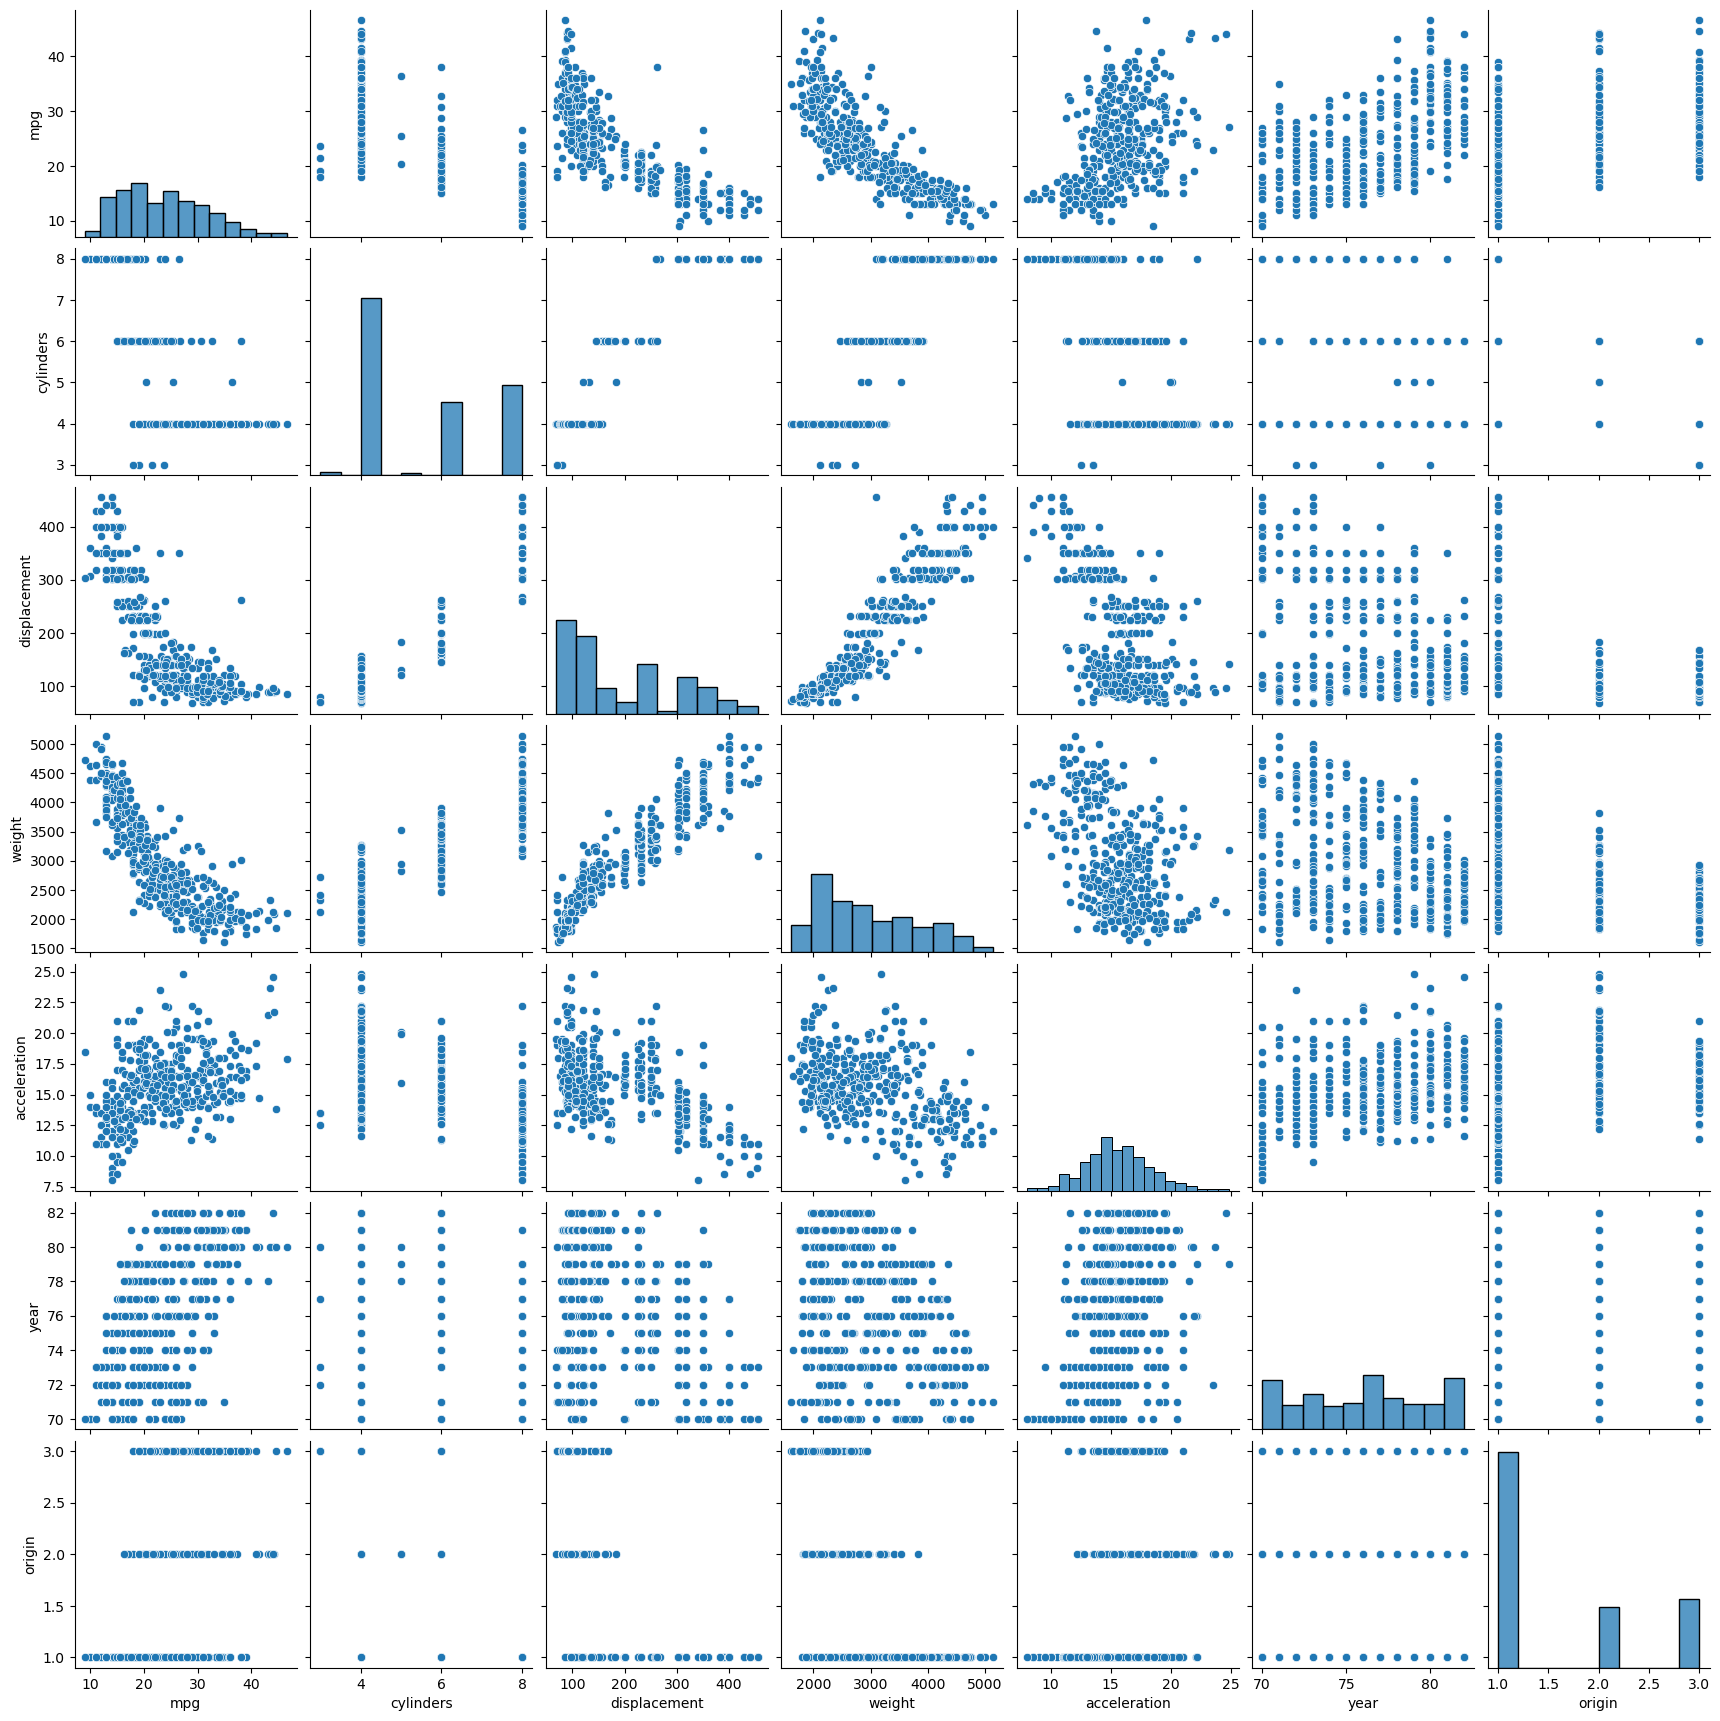

In [1]:
#Q2.1: Produce a scatterplot matrix of all of the variables (in python)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading Auto.csv
auto = pd.read_csv("Auto.csv")

#creating the scatterplot matrix
sns.pairplot(auto)
plt.show()

#the diagonal plots are not scatterplots but instead histograms
#they show the distribution of the variable instead of a scatter plot of a variable against itself which would be uninformative

In [2]:
#Q2.2
#Rather than appearing to be a problem due to overfitting, it seems that the reason why my regression plot
#is not linear is because the scikitlearn linear regression object refers to a linearity between or among functions of predictors
#probably need to use something other than the LinearRegression object if I want my output to be "truly" linear
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import t
import statsmodels.api as sm

#there is a problem with ?'s in the horsepower category
auto['horsepower'].replace('?', np.nan, inplace=True) #replaces ?'s with NaN
auto['horsepower'] = auto['horsepower'].astype(float) #converts the series to float
hp_mu = auto['horsepower'].mean() #calculates the mean of the series
auto['horsepower'].replace(np.nan, hp_mu, inplace=True) #replaces the NaNs with mean floats they do not disrupt regression

y = auto['mpg'] #response variable; a column being a pandas Series
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']] #predictors; returns a new pandas DataFrame with just these columns from an input of a list of columns

#an instance of the LinearRegression class
model = LinearRegression()
model_horsepower = LinearRegression()
#fitting the model using the data, making predictions
model.fit(X, y)
y_pred = model.predict(X)

def summary(model, X, y): #building a clone of the R language summary function
    #model is a fitted scikit-learn model, X is the predictor matrix, y is the response
    
    coef = model.coef_ #this prints the "beta hat one"s
    intercept = model.intercept_ #this prints the "beta hat zero" (mean of the dependent variable when set all of the independent variables to zero)
    Rsq = model.score(X, y) #R squared
    y_hat = model.predict(X)
    residuals = y - y_hat #residual errors
    
    n = y.shape[0] #this gives the number of rows
    k = X.shape[1] #this gives the number of columns
    adjRsq = 1 - (1-Rsq)*(n-1) / (n - k - 1) #a formula for adjusted R squared
    
    df = n - k - 1 #Degrees of freedom
    
    TSS = np.sum((y - y.mean())**2) #total sum of squares
    RSS = np.sum((y - y_hat)**2) #residual sum of squres
    F = (TSS - RSS)/k/(RSS / df) #F statistic
      
    # More accurate calculation of standard error for each coefficient
    X_with_const = sm.add_constant(X)  # Adding a constant for the intercept term
    mse = RSS / df
    se = np.sqrt(np.diagonal(mse * np.linalg.inv(np.dot(X_with_const.T, X_with_const)))) #computing the standard error
    
    full_coef = np.append(intercept, coef)
    t_scores = full_coef / se #t-score
    p_values = 2 * (1 - t.cdf(np.abs(t_scores), df)) #p-value
    
    # Print summary with labeled coefficients
    column_names = ['Intercept'] + list(X.columns)
    print("Summary:")
    print("========")
    for name, coef, t_value, p_value in zip(column_names, full_coef, t_scores, p_values):
        print(f"{name}: Coef: {coef}, t-value: {t_value}, p-value: {p_value}")
    
    print("--------")
    print("Residuals:", residuals)
    print("R-squared:", Rsq)
    print("Adjusted R-squared:", adjRsq)
    print("F-statistic:", F)
    print("Degrees of Freedom:", df)

summary(model, X, y)

Summary:
Intercept: Coef: -18.711571750088723, t-value: -4.059871034565358, p-value: 5.938216213352554e-05
cylinders: Coef: -0.4452052028925227, t-value: -1.380467126918702, p-value: 0.1682355757077283
displacement: Coef: 0.018912652113074566, t-value: 2.523510556175004, p-value: 0.0120164499686497
horsepower: Coef: -0.009394051949748709, t-value: -0.7088679326213323, p-value: 0.47883103593124643
weight: Coef: -0.006732427654902929, t-value: -10.507992029779759, p-value: 0.0
acceleration: Coef: 0.11788840257546618, t-value: 1.2173035242140464, p-value: 0.22422670191060767
year: Coef: 0.7624582872544831, t-value: 15.071432079772883, p-value: 0.0
origin: Coef: 1.3967994182129289, t-value: 5.073202542860013, p-value: 6.069968665478598e-07
--------
Residuals: 0      3.095142
1      0.942063
2      2.735067
3      0.861759
4      2.090195
         ...   
392   -1.321455
393    9.271194
394    0.893322
395   -1.473476
396    2.118888
Name: mpg, Length: 397, dtype: float64
R-squared: 0.821626

*Q2.2 Comment on your findings:* There is a negative intercept ($\hat{\beta}_0$)on the mpg with high confidence (p < 0.05), a negative correlation on the cylinders with the mpg having low confidence (p > 0.05), a positive correlation between displacement and the mpg with high confidence (p < 0.05), a negligible negative correlation between horsepower and mpg with very low confidence (p > 0.05), negligible correlation between the weight and the mpg with high confidence (p < 0.05) a positive correlation between acceleration and mpg with low confidence (p > 0.05), a positive correlation between year and mpg with high confidence (p < 0.05), and positive correlation between origin and mpg with high confidence (p< 0.05). However, a categorical/discrete sorting algorithm is probably better for origin and cylinders, as these are not continuous variables. Year is somewhere in the middle, because although these integer values are fundamentally discrete, linear regression is still useful in interpreting this data because it makes sense that the mpg would increase through time due to technological innovation around efficiency in the auto industry. With overall $R^2$ and adjusted $R^2$ values being $> 0.8$, we can be confident in the predictive power of this multilinear regression model overall.

Note: in this "redo" of the original assignment, I decide to plot the results quite differently (by generating a new "transient" model into a loop that generates single regression lines for each predictor) in order to ensure that the predictions plotted are actually lines with respect to each predictor. It appears that scikit learn's basic multiple linear regression produces correlations with respect to each variable that are nonlinear, perhaps such that they are each linear with respect to one another. Notably, the $\hat{\beta_i}$ coefficients are quite different between the linear models and the multiple linear model (e.g., for cylinders, we have Coef = -3.57 for the linear model and Coef = - 0.445 for the multiple linear model); this becomes apparent when the printed outputs of the cloned `R` summary function are compared in the consoles. We find that transforming the predictors for each individual "transient" model into the squares or square roots has the same effect as in the multiple linear regression regime: square root of the predictors has a slightly better correlation, and the square of the predictors has a slightly worse correlation.

Summary:
Intercept: Coef: 43.0032261537042, t-value: 51.56305804323893, p-value: 0.0
cylinders: Coef: -3.570134186903815, t-value: -24.472627378635472, p-value: 0.0
--------
Residuals: 0       3.557847
1       0.557847
2       3.557847
3       1.557847
4       2.557847
         ...    
392    -1.722689
393    15.277311
394     3.277311
395    -0.722689
396     2.277311
Name: mpg, Length: 397, dtype: float64
R-squared: 0.6025795068354938
Adjusted R-squared: 0.6015733790046975
F-statistic: 598.9094908135393
Degrees of Freedom: 395


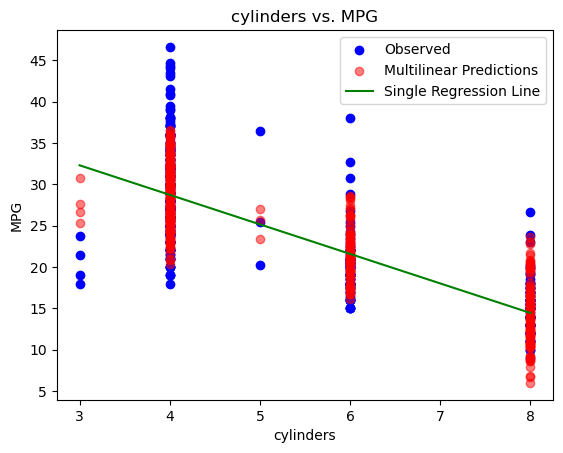

Summary:
Intercept: Coef: 35.188349677248965, t-value: 71.43331007480496, p-value: 0.0
displacement: Coef: -0.06031269087779052, t-value: -26.914457255667717, p-value: 0.0
--------
Residuals: 0       1.327646
1       0.921092
2       1.991086
3      -0.853292
4       0.026083
         ...    
392     0.255427
393    14.661981
394     4.953864
395     0.049173
396     2.988861
Name: mpg, Length: 397, dtype: float64
R-squared: 0.6471286125145206
Adjusted R-squared: 0.6462352672297472
F-statistic: 724.388009367164
Degrees of Freedom: 395


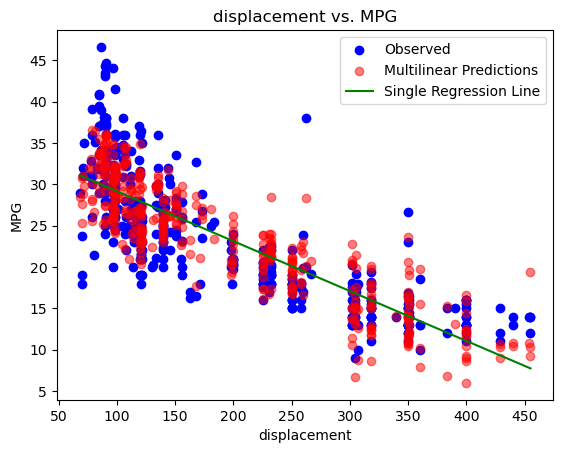

Summary:
Intercept: Coef: 40.005811671455774, t-value: 54.90276194936884, p-value: 0.0
horsepower: Coef: -0.15784473335365362, t-value: -24.095683552911474, p-value: 0.0
--------
Residuals: 0      -1.485996
1       1.038569
2       1.670898
3      -0.329102
4      -0.907549
         ...    
392     0.568835
393    12.202114
394     5.253146
395     0.463922
396     3.937456
Name: mpg, Length: 397, dtype: float64
R-squared: 0.5951217670590911
Adjusted R-squared: 0.5940967588744306
F-statistic: 580.6019658820469
Degrees of Freedom: 395


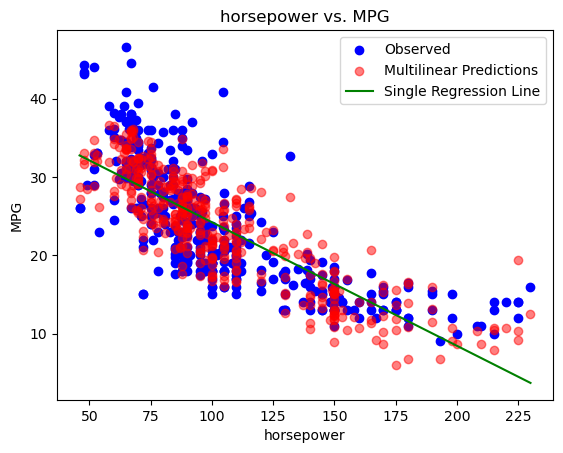

Summary:
Intercept: Coef: 46.3173991752533, t-value: 58.16638696164459, p-value: 0.0
weight: Coef: -0.007676605776976104, t-value: -29.775697199609052, p-value: 0.0
--------
Residuals: 0      -1.418573
1      -2.967694
2      -1.940582
3      -3.963612
4      -2.840786
         ...    
392     2.100331
393    14.033771
394     3.300411
395     1.833691
396     5.562969
Name: mpg, Length: 397, dtype: float64
R-squared: 0.6917896212654734
Adjusted R-squared: 0.6910093418256391
F-statistic: 886.5921437228063
Degrees of Freedom: 395


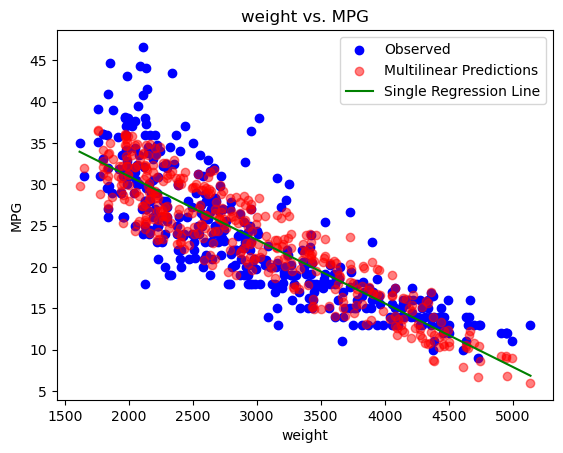

Summary:
Intercept: Coef: 4.821789480611368, t-value: 2.351840174940732, p-value: 0.019171068681203884
acceleration: Coef: 1.2017536071308514, t-value: 9.259117682552459, p-value: 0.0
--------
Residuals: 0      -1.242833
1      -3.641956
2      -0.041079
3      -3.242833
4      -0.440202
         ...    
392     3.430854
393     9.615072
394    13.237869
395     0.825593
396     2.864191
Name: mpg, Length: 397, dtype: float64
R-squared: 0.1783351060072641
Adjusted R-squared: 0.17625494171867484
F-statistic: 85.73126025935832
Degrees of Freedom: 395


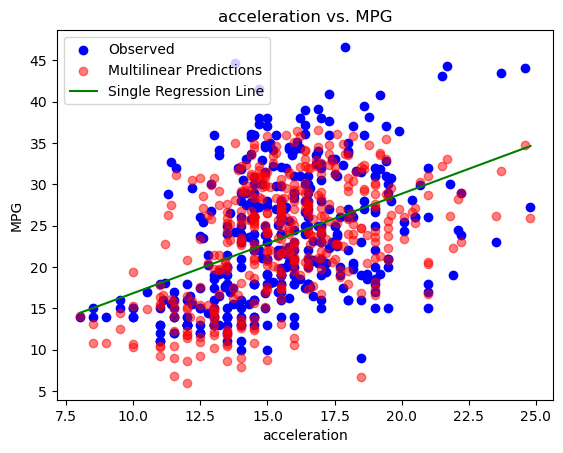

Summary:
Intercept: Coef: -70.2001284674533, t-value: -10.627853903524244, p-value: 0.0
year: Coef: 1.2331869738673835, t-value: 14.204680663749164, p-value: 0.0
--------
Residuals: 0       1.877040
1      -1.122960
2       1.877040
3      -0.122960
4       0.877040
         ...    
392    -3.921203
393    13.078797
394     1.078797
395    -2.921203
396     0.078797
Name: mpg, Length: 397, dtype: float64
R-squared: 0.338106731925805
Adjusted R-squared: 0.3364310527661234
F-statistic: 201.77295275908807
Degrees of Freedom: 395


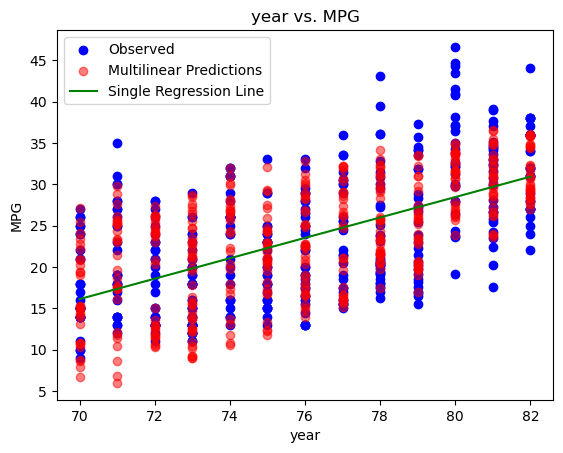

Summary:
Intercept: Coef: 14.862343716052065, t-value: 20.759564383281365, p-value: 0.0
origin: Coef: 5.496719271563728, t-value: 13.563597458519252, p-value: 0.0
--------
Residuals: 0      -2.359063
1      -5.359063
2      -2.359063
3      -4.359063
4      -3.359063
         ...    
392     6.640937
393    18.144218
394    11.640937
395     7.640937
396    10.640937
Name: mpg, Length: 397, dtype: float64
R-squared: 0.31775532813645224
Adjusted R-squared: 0.3160281264355319
F-statistic: 183.97117601675004
Degrees of Freedom: 395


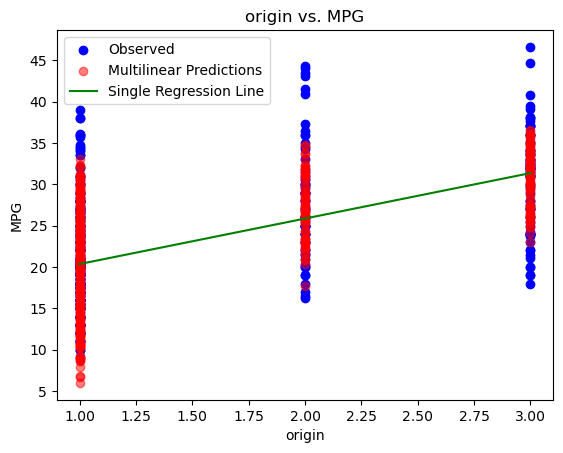

In [10]:
#Q2.3:Use matplotlib to plot the findings

model_transient = LinearRegression()
#this is a "placeholder" model that we will refit in the following loop

#this loops through the columns and makes individual linear models for each column
#that way we can make the curve linear with respect to each variable as opposed to one multilinear model
for column_name in X.columns:
    x_vals = np.linspace(X[column_name].min(), X[column_name].max(), 400)
    model_transient.fit(X[[column_name]], y)
    y_vals = model_transient.predict(pd.DataFrame({column_name: x_vals}))
    summary(model_transient, X[[column_name]], y)
    plt.scatter(X[column_name], y, color='blue', label='Observed')
    plt.scatter(X[column_name], y_pred,color='red', label='Multilinear Predictions', alpha=0.5)
    plt.plot(x_vals, y_vals, color='green', label='Single Regression Line')
    plt.xlabel(column_name)
    plt.ylabel('MPG')
    plt.title(column_name + ' vs. MPG')
    plt.legend()
    plt.show()


Summary:
Intercept: Coef: -53.90839978418012, t-value: -5.941617359889676, p-value: 6.271484664921445e-09
cylinders: Coef: 0.01001109458295072, t-value: 0.0065121229523148385, p-value: 0.9948074526386175
displacement: Coef: 0.20171791114103044, t-value: 0.878725694592024, p-value: 0.38009247456313355
horsepower: Coef: -0.5426986432279476, t-value: -1.8678181876041224, p-value: 0.0625391110568716
weight: Coef: -0.6657568270898705, t-value: -8.657160340920045, p-value: 0.0
acceleration: Coef: -0.35242383260914273, t-value: -0.4363281474534296, p-value: 0.6628407237826544
year: Coef: 13.037938040295607, t-value: 15.289907896700349, p-value: 0.0
origin: Coef: 3.1507398404143245, t-value: 4.142821290464302, p-value: 4.211447346524899e-05
--------
Residuals: 0      2.929499
1      1.496631
2      2.889451
3      1.004459
4      1.802617
         ...   
392   -1.122353
393    9.769696
394    0.398417
395   -1.082200
396    2.661844
Name: mpg, Length: 397, dtype: float64
R-squared: 0.833523988

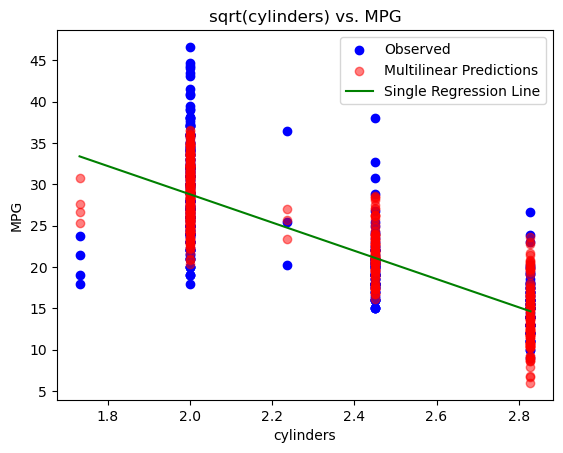

Summary:
Intercept: Coef: 47.234399549431174, t-value: 54.93496353561236, p-value: 0.0
displacement: Coef: -1.7662355394297398, t-value: -28.57697729766784, p-value: 0.0
--------
Residuals: 0       1.712547
1       0.808842
2       2.262092
3      -0.439031
4       0.459502
         ...    
392     0.663981
393    14.161003
394     5.287403
395     0.113741
396     3.032955
Name: mpg, Length: 397, dtype: float64
R-squared: 0.6739965533262389
Adjusted R-squared: 0.6731712281447864
F-statistic: 816.6436314714343
Degrees of Freedom: 395


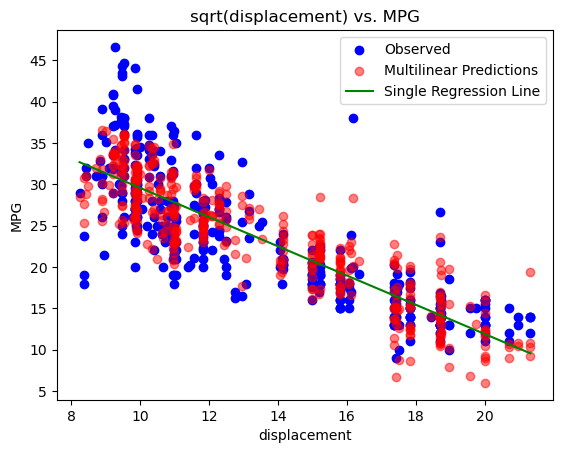

Summary:
Intercept: Coef: 58.743906990764465, t-value: 42.67144373082278, p-value: 0.0
horsepower: Coef: -3.4997340132284234, t-value: -25.983884219612026, p-value: 0.0
--------
Residuals: 0      -0.840800
1       1.210990
2       2.118906
3       0.118906
4      -0.334496
         ...    
392     0.711291
393    10.493034
394     5.331685
395     0.362409
396     3.947532
Name: mpg, Length: 397, dtype: float64
R-squared: 0.6308970868584465
Adjusted R-squared: 0.6299626491036577
F-statistic: 675.162239138207
Degrees of Freedom: 395


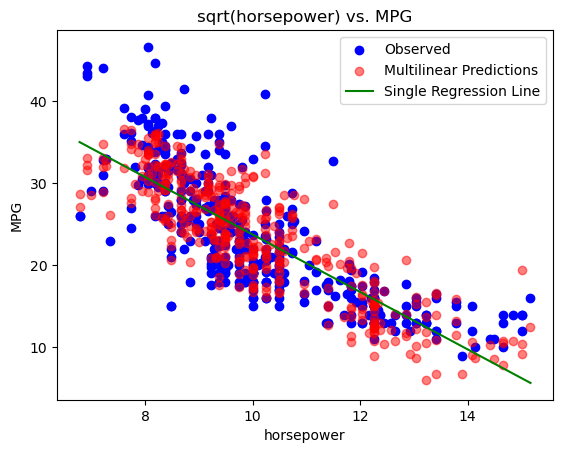

Summary:
Intercept: Coef: 69.8470934046681, t-value: 45.879857609622015, p-value: 0.0
weight: Coef: -0.8586002761736726, t-value: -30.737045780612025, p-value: 0.0
--------
Residuals: 0      -1.022598
1      -2.669904
2      -1.518175
3      -3.540151
4      -2.423055
         ...    
392     2.504560
393    13.778960
394     3.285147
395     2.143080
396     5.932018
Name: mpg, Length: 397, dtype: float64
R-squared: 0.705172392105865
Adjusted R-squared: 0.7044259930985382
F-statistic: 944.7659833194264
Degrees of Freedom: 395


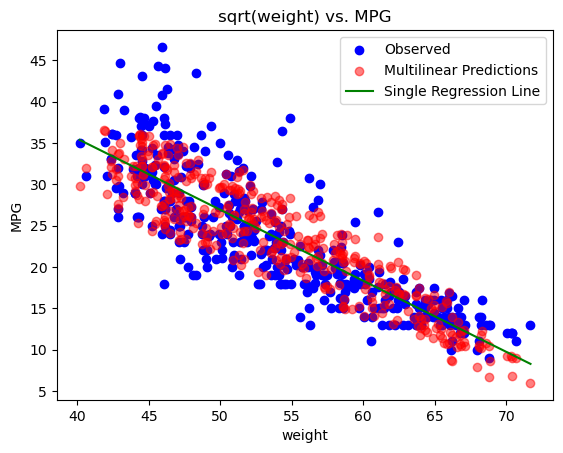

Summary:
Intercept: Coef: -14.273555762844815, t-value: -3.5596003141209582, p-value: 0.00041664285610765184
acceleration: Coef: 9.61912133790594, t-value: 9.461255905641313, p-value: 0.0
--------
Residuals: 0      -1.048058
1      -3.346472
2       0.370539
3      -3.048058
4       0.104040
         ...    
392     3.281071
393    10.564265
394    13.512009
395     0.788481
396     2.905721
Name: mpg, Length: 397, dtype: float64
R-squared: 0.18475237338219508
Adjusted R-squared: 0.1826884553401248
F-statistic: 89.51536331203498
Degrees of Freedom: 395


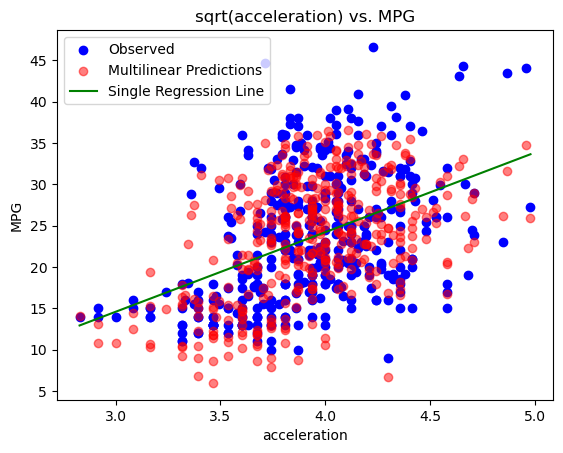

Summary:
Intercept: Coef: -163.13893774212346, t-value: -12.34753428784955, p-value: 0.0
year: Coef: 21.417786970633284, t-value: 14.131543737355729, p-value: 0.0
--------
Residuals: 0       1.944876
1      -1.055124
2       1.944876
3      -0.055124
4       0.944876
         ...    
392    -3.807372
393    13.192628
394     1.192628
395    -2.807372
396     0.192628
Name: mpg, Length: 397, dtype: float64
R-squared: 0.33580015295765886
Adjusted R-squared: 0.33411863435755174
F-statistic: 199.70052840108485
Degrees of Freedom: 395


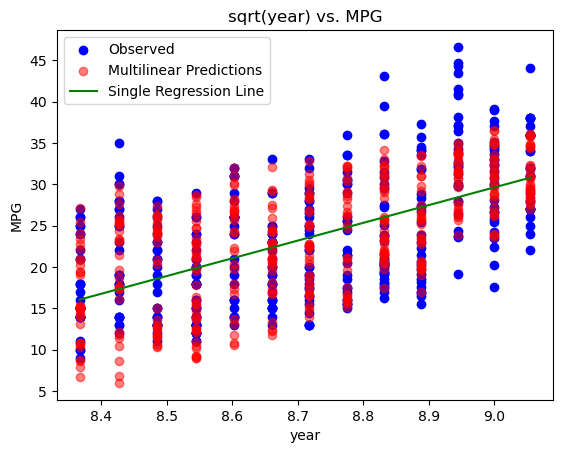

Summary:
Intercept: Coef: 5.318831435198792, t-value: 3.915464203056155, p-value: 0.00010627295169673978
origin: Coef: 14.931420673585862, t-value: 13.791544897298486, p-value: 0.0
--------
Residuals: 0      -2.250252
1      -5.250252
2      -2.250252
3      -4.250252
4      -3.250252
         ...    
392     6.749748
393    17.564951
394    11.749748
395     7.749748
396    10.749748
Name: mpg, Length: 397, dtype: float64
R-squared: 0.32502482830651236
Adjusted R-squared: 0.3233160304034909
F-statistic: 190.2067106542003
Degrees of Freedom: 395


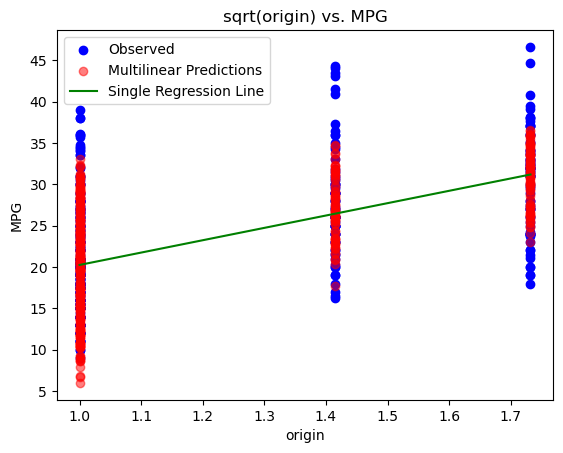

In [4]:
#Q2.4 Based on the correlation matrix and the scatterplots, try transformation of the predictors (e.g, $X^2$ or $\sqrt{X}$). Comment on your findings.
#this cell is doing the square root of X$
#It is notable that there is a slightly higher R^2 value when the regression is performed against sqrtXS

sqrtX = np.sqrt(X)

#an instance of the LinearRegression class
sqrt_model = LinearRegression()

#fitting the model using the data
sqrt_model.fit(sqrtX, y)

summary(sqrt_model, sqrtX, y)
sqrt_model_transient = LinearRegression()
#this is a "placeholder" model that we will refit in the following loop

#this loops through the columns and makes individual linear models for each column
#that way we can make the curve linear with respect to each variable as opposed to one multilinear model
for column_name in sqrtX.columns:
    x_vals = np.linspace(sqrtX[column_name].min(), sqrtX[column_name].max(), 400)
    model_transient.fit(sqrtX[[column_name]], y)
    y_vals = model_transient.predict(pd.DataFrame({column_name: x_vals}))
    summary(model_transient, sqrtX[[column_name]], y)
    plt.scatter(sqrtX[column_name], y, color='blue', label='Observed')
    plt.scatter(sqrtX[column_name], y_pred, color='red', label='Multilinear Predictions', alpha=0.5)
    plt.plot(x_vals, y_vals, color='green', label='Single Regression Line')
    plt.xlabel(column_name)
    plt.ylabel('MPG')
    plt.title("sqrt(" + column_name + ') vs. MPG')
    plt.legend()
    plt.show()


Summary:
Intercept: Coef: 0.7762692295763891, t-value: 0.33020921366204986, p-value: 0.7414196463901093
cylinders: Coef: -0.08551271563327613, t-value: -3.3933968657499842, p-value: 0.0007612308099820275
displacement: Coef: 5.5220872356557254e-05, t-value: 3.996772231957545, p-value: 7.682476841730512e-05
horsepower: Coef: -1.9725856250139424e-05, t-value: -0.4010026404739809, p-value: 0.6886383501541509
weight: Coef: -9.578927564823575e-07, t-value: -10.714700165475183, p-value: 0.0
acceleration: Coef: 0.006817551550865595, t-value: 2.5460806642695197, p-value: 0.011278764564458532
year: Coef: 0.005056817960783975, t-value: 14.404811530467068, p-value: 0.0
origin: Coef: 0.40815512066865683, t-value: 5.928078618370392, p-value: 6.76437705848798e-09
--------
Residuals: 0      3.418132
1      0.444820
2      2.853708
3      1.158028
4      2.503319
         ...   
392   -1.957488
393    8.711189
394    1.442396
395   -2.248457
396    1.053409
Name: mpg, Length: 397, dtype: float64
R-squa

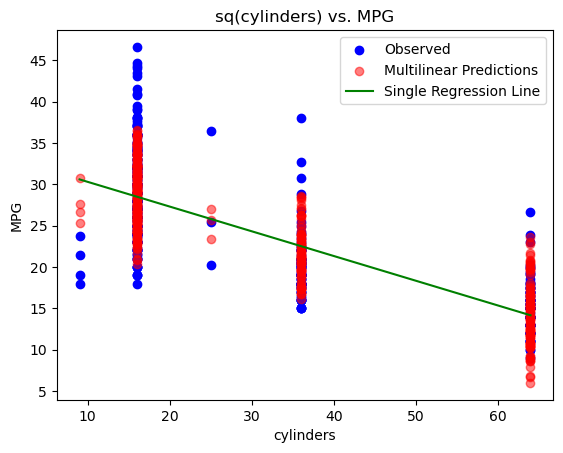

Summary:
Intercept: Coef: 29.306539435165313, t-value: 80.38166781710798, p-value: 0.0
displacement: Coef: -0.00011983364138254856, t-value: -22.618360832652552, p-value: 0.0
--------
Residuals: 0      -0.012339
1       0.373082
2       0.811518
3      -2.231994
4      -1.377232
         ...    
392     0.042200
393    15.820975
394     4.877429
395     0.419065
396     3.390425
Name: mpg, Length: 397, dtype: float64
R-squared: 0.5643015117211164
Adjusted R-squared: 0.563198477573575
F-statistic: 511.59024675607066
Degrees of Freedom: 395


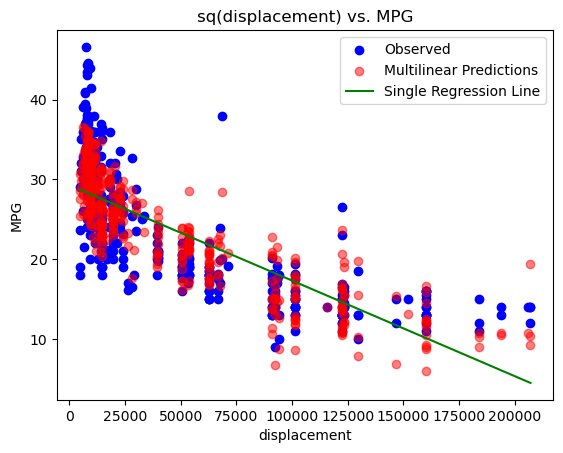

Summary:
Intercept: Coef: 30.536484074397976, t-value: 67.93015454916315, p-value: 0.0
horsepower: Coef: -0.000567412715360693, t-value: -19.876736254261044, p-value: 0.0
--------
Residuals: 0      -2.947209
1      -0.088673
2       0.230302
3      -1.769698
4      -2.415195
         ...    
392     0.660100
393    14.997800
394     5.467180
395     1.004739
396     4.278799
Name: mpg, Length: 397, dtype: float64
R-squared: 0.500053566489417
Adjusted R-squared: 0.49878787931597257
F-statistic: 395.08464412145577
Degrees of Freedom: 395


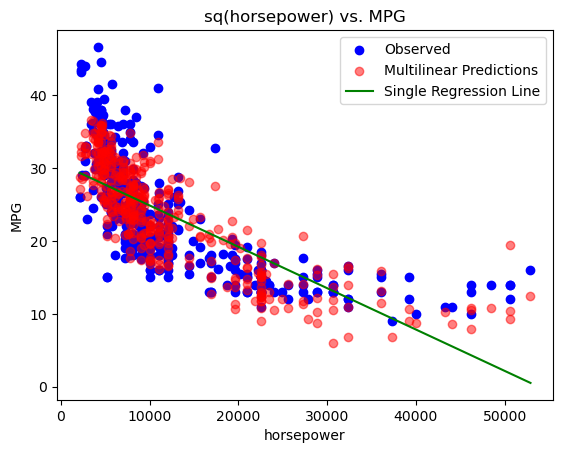

Summary:
Intercept: Coef: 34.53326438023169, t-value: 73.6071075610415, p-value: 0.0
weight: Coef: -1.1549132918591328e-06, t-value: -27.05016517377326, p-value: 0.0
--------
Residuals: 0      -2.353221
1      -3.782269
2      -2.898247
3      -4.922046
4      -3.794877
         ...    
392     1.456696
393    14.706462
394     3.549693
395     1.424810
396     5.011246
Name: mpg, Length: 397, dtype: float64
R-squared: 0.6494222145934665
Adjusted R-squared: 0.6485346758962347
F-statistic: 731.7114359284178
Degrees of Freedom: 395


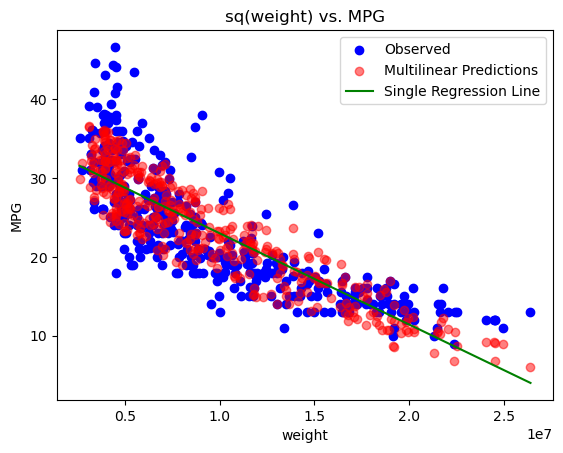

Summary:
Intercept: Coef: 14.630715319146724, t-value: 13.559489476347759, p-value: 0.0
acceleration: Coef: 0.03560866771174119, t-value: 8.735198601007083, p-value: 0.0
--------
Residuals: 0      -1.758363
1      -4.339962
2      -0.939364
3      -3.758363
4      -1.556571
         ...    
392     3.703559
393     7.820343
394    12.577782
395     1.050110
396     2.967607
Name: mpg, Length: 397, dtype: float64
R-squared: 0.16189920739736996
Adjusted R-squared: 0.15977743323888227
F-statistic: 76.30369459903602
Degrees of Freedom: 395


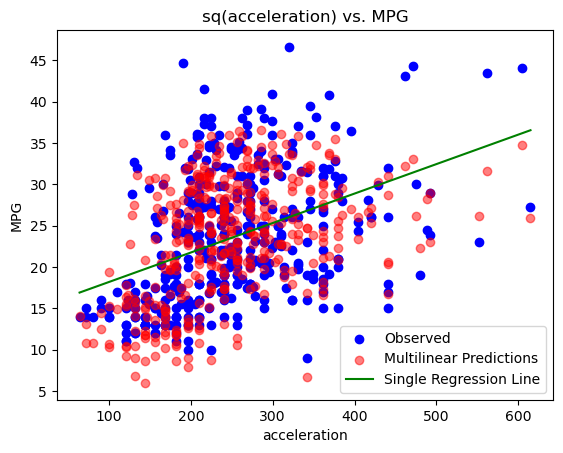

Summary:
Intercept: Coef: -23.728124321989014, t-value: -7.170405589562739, p-value: 3.708811036062798e-12
year: Coef: 0.008161253070208183, t-value: 14.343423480114902, p-value: 0.0
--------
Residuals: 0       1.737984
1      -1.262016
2       1.737984
3      -0.262016
4       0.737984
         ...    
392    -4.148141
393    12.851859
394     0.851859
395    -3.148141
396    -0.148141
Name: mpg, Length: 397, dtype: float64
R-squared: 0.34247082170644216
Adjusted R-squared: 0.34080619087531927
F-statistic: 205.7337971299121
Degrees of Freedom: 395


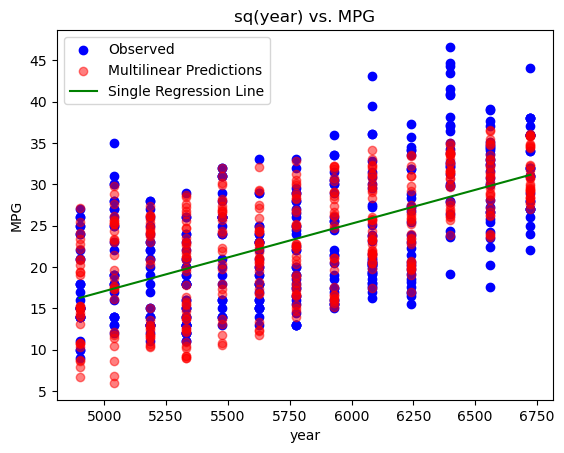

Summary:
Intercept: Coef: 19.27353940704402, t-value: 41.425238150233156, p-value: 0.0
origin: Coef: 1.3593259527066384, t-value: 12.922857206997802, p-value: 0.0
--------
Residuals: 0      -2.632865
1      -5.632865
2      -2.632865
3      -4.632865
4      -3.632865
         ...    
392     6.367135
393    19.289157
394    11.367135
395     7.367135
396    10.367135
Name: mpg, Length: 397, dtype: float64
R-squared: 0.2971533230486565
Adjusted R-squared: 0.29537396437283026
F-statistic: 167.00023839245523
Degrees of Freedom: 395


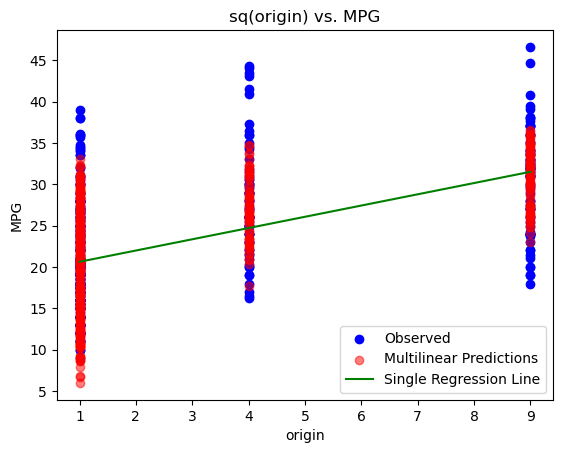

In [5]:
#Q2.4 Based on the correlation matrix and the scatterplots, try transformation of the predictors (e.g, $X^2$ or $\sqrt{X}$). Comment on your findings.
#this cell is doing the square of X
#It is notable that there is a slightly lower R^2 value when the regression is performed against $X^2$

sqX = X**2

#an instance of the LinearRegression class
sq_model = LinearRegression()

#fitting the model using the data
sq_model.fit(sqX, y)

summary(sq_model, sqX, y)
sq_model_transient = LinearRegression()
#this is a "placeholder" model that we will refit in the following loop

#this loops through the columns and makes individual linear models for each column
#that way we can make the curve linear with respect to each variable as opposed to one multilinear model
for column_name in sqX.columns:
    x_vals = np.linspace(sqX[column_name].min(), sqX[column_name].max(), 400)
    sq_model_transient.fit(sqX[[column_name]], y)
    y_vals = sq_model_transient.predict(pd.DataFrame({column_name: x_vals}))
    summary(sq_model_transient, sqX[[column_name]], y)
    plt.scatter(sqX[column_name], y, color='blue', label='Observed')
    plt.scatter(sqX[column_name], y_pred, color='red', label='Multilinear Predictions', alpha=0.5)
    plt.plot(x_vals, y_vals, color='green', label='Single Regression Line')
    plt.xlabel(column_name)
    plt.ylabel('MPG')
    plt.title("sq(" + column_name + ') vs. MPG')
    plt.legend()
    plt.show()

*Q2.4 Based on the correlation matrix and the scatterplots, try transformation of the predictors (e.g, $X^2$ or $\sqrt{X}$). Comment on your findings*:

The $R^2$ value of the model based on $X$ is $0.8216$, the $R^2$ value of the model based on $\sqrt{X}$ is $0.8335$, and the $R^2$ value of the model based on $X^2$ is $0.7941$. The multilinear regression model based on the square root of the predictors is preferred.